In [1]:
library(reticulate)
#sc <- import("scanpy")
library(Seurat)
library(tidyverse)
library(R.utils)
library(svglite)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.26.0 (2024-01-24 05:12:50 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is m

In [2]:
# load dataframe with phylostatas
data1 <-read.csv("MusMusculus.PhyloMap.csv", sep = ",")
head(data1)

,ensembl_gene_id,phylostratum,Description
,<chr>,<int>,<chr>
1,ENSMUSG00000074155,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000086875,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000006948,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000079344,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000055193,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000004789,1,Life before LCA of Cellular organisms - cellular organisms


In [3]:
unique_rows <- unique(data1[, c(2, 3)])
unique_rows

,phylostratum,Description
,<int>,<chr>
1,1,Life before LCA of Cellular organisms - cellular organisms
7239,2,cellular organisms - Eukaryota
13112,3,Eukaryota - Opisthokonta
13635,4,Opisthokonta - Holozoa
14431,5,Holozoa - Metazoa
15613,6,Metazoa - Eumetazoa
17668,7,Eumetazoa - Bilateria
18609,8,Bilateria - Deuterostomia
18721,9,Deuterostomia - Chordata


In [4]:
# Read gene_Ensamble_dataframe
gene_mapping <- read.table("mart_export-1.txt", header = TRUE, sep = ",")

# Display the mapping dataframe
print(head(gene_mapping))

      Gene.stable.ID Gene.name
1 ENSMUSG00000064336     mt-Tf
2 ENSMUSG00000064337   mt-Rnr1
3 ENSMUSG00000064338     mt-Tv
4 ENSMUSG00000064339   mt-Rnr2
5 ENSMUSG00000064340    mt-Tl1
6 ENSMUSG00000064341    mt-Nd1


In [4]:
head(data1)

,ensembl_gene_id,phylostratum,Description
,<chr>,<int>,<chr>
1,ENSMUSG00000074155,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000086875,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000006948,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000079344,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000055193,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000004789,1,Life before LCA of Cellular organisms - cellular organisms


# all genes not unique

In [5]:
# Genes

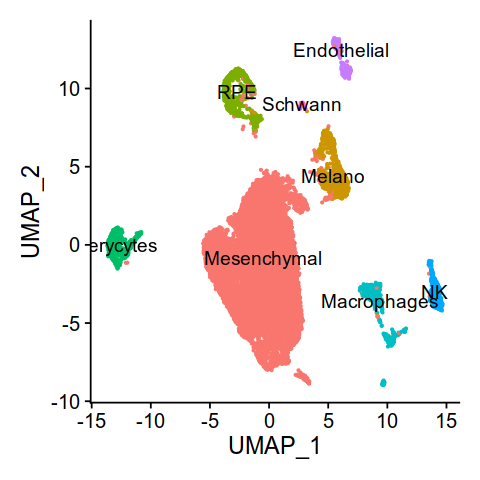

In [219]:
seurat2 <- readRDS(file = "~/data/retina/h5ad/20_09_WORKING_MESENCHYMAL_togeth_together_umap.rds")
DimPlot(seurat2, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()
options(repr.plot.height = 4, repr.plot.width = 4)

In [8]:
hv_genes <- VariableFeatures(seurat2)

In [168]:
#cluster_1 <- 'Melano'
#markers_Melano <- FindMarkers(seurat2, ident.1 = cluster_1)
MEL.marker<-(filter(markers_Melano,   p_val < 0.05 & avg_log2FC>3.5, ))

#head(MEL.marker)
#MEL.marker_genes<-rownames(MEL.marker)
#(MEL.marker_genes)

In [169]:
head(MEL.marker)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mlph,0,3.867720,0.880,0.221,0
Tyr,0,3.813609,0.856,0.217,0
Syt4,0,4.156864,0.798,0.172,0
Slc45a2,0,4.111487,0.789,0.171,0
Rab38,0,4.330236,0.705,0.098,0
Slc24a5,0,3.754355,0.871,0.290,0


In [170]:
# Convert row names to a column
MEL.marker1 <- tibble::rownames_to_column(MEL.marker, "gene_name")

head(MEL.marker1)

,gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mlph,0,3.867720,0.880,0.221,0
2,Tyr,0,3.813609,0.856,0.217,0
3,Syt4,0,4.156864,0.798,0.172,0
4,Slc45a2,0,4.111487,0.789,0.171,0
5,Rab38,0,4.330236,0.705,0.098,0
6,Slc24a5,0,3.754355,0.871,0.290,0


In [171]:
# Merge the dataframes
Mel_gene_ens <- MEL.marker1 %>%
  left_join(gene_mapping, by = c("gene_name" = "Gene.name"))

In [172]:
head(Mel_gene_ens)

,gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Gene.stable.ID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Mlph,0,3.867720,0.880,0.221,0,ENSMUSG00000026303
2,Tyr,0,3.813609,0.856,0.217,0,ENSMUSG00000004651
3,Syt4,0,4.156864,0.798,0.172,0,ENSMUSG00000024261
4,Slc45a2,0,4.111487,0.789,0.171,0,ENSMUSG00000022243
5,Rab38,0,4.330236,0.705,0.098,0,ENSMUSG00000030559
6,Slc24a5,0,3.754355,0.871,0.290,0,ENSMUSG00000035183


In [173]:
head(data1)

,ensembl_gene_id,phylostratum,Description
,<chr>,<int>,<chr>
1,ENSMUSG00000074155,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000086875,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000006948,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000079344,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000055193,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000004789,1,Life before LCA of Cellular organisms - cellular organisms


In [174]:
 #Merge the dataframes based on Gene.stable.ID and ensembl_gene_id
merged_df <- data1 %>%
  inner_join(Mel_gene_ens, by = c("ensembl_gene_id" = "Gene.stable.ID")) %>%
  select(ensembl_gene_id, gene_name, everything())

In [175]:
head(merged_df)

,ensembl_gene_id,gene_name,phylostratum,Description,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000030559,Rab38,1,Life before LCA of Cellular organisms - cellular organisms,0.000000e+00,4.330236,0.705,0.098,0.000000e+00
2,ENSMUSG00000028020,Glrb,1,Life before LCA of Cellular organisms - cellular organisms,0.000000e+00,3.843816,0.332,0.034,0.000000e+00
3,ENSMUSG00000048939,Atp13a5,1,Life before LCA of Cellular organisms - cellular organisms,3.513882e-27,4.158636,0.017,0.001,1.134457e-22
4,ENSMUSG00000025892,Gria4,1,Life before LCA of Cellular organisms - cellular organisms,1.044303e-19,3.985699,0.015,0.001,3.371532e-15
5,ENSMUSG00000019726,Lyst,1,Life before LCA of Cellular organisms - cellular organisms,4.159397e-277,3.621282,0.421,0.087,1.342861e-272
6,ENSMUSG00000074001,Klhl40,1,Life before LCA of Cellular organisms - cellular organisms,1.507013e-23,4.553133,0.015,0.001,4.865392e-19


In [176]:
# Select the specified columns and add the new column
Melano_genes_phylostrat_26_07<- merged_df %>%
  select(ensembl_gene_id, gene_name, phylostratum, Description) %>%
  mutate(type = "Mel_genes")

# Display the resulting dataframe
head(Melano_genes_phylostrat_26_07)

,ensembl_gene_id,gene_name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
1,ENSMUSG00000030559,Rab38,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
2,ENSMUSG00000028020,Glrb,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
3,ENSMUSG00000048939,Atp13a5,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
4,ENSMUSG00000025892,Gria4,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
5,ENSMUSG00000019726,Lyst,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
6,ENSMUSG00000074001,Klhl40,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes


In [178]:
head(Melano_genes_phylostrat_26_07)

,ensembl_gene_id,gene_name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
1,ENSMUSG00000030559,Rab38,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
2,ENSMUSG00000028020,Glrb,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
3,ENSMUSG00000048939,Atp13a5,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
4,ENSMUSG00000025892,Gria4,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
5,ENSMUSG00000019726,Lyst,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes
6,ENSMUSG00000074001,Klhl40,1,Life before LCA of Cellular organisms - cellular organisms,Mel_genes


In [207]:
Melano_genes_phylostrat_26_071<-Melano_genes_phylostrat_26_07[Melano_genes_phylostrat_26_07$phylostratum>7,]
Melano_genes_phylostrat_26_071$gene_name

[1] "Pmel"          "Gpnmb"         "Mreg"          "Cited1"       
 [5] "Scrg1"         "Cck"           "Fam83f"        "Azgp1"        
 [9] "Snca"          "Tmem82"        "Fxyd3"         "Psrc1"        
[13] "Bricd5"        "Prlh"          "Mlana"         "Cmtm5"        
[17] "Cort"          "Pianp"         "Smco3"         "1700001O22Rik"
[21] "Tmem88b"       "Snhg11"        "H60b"          "M5C1000I18Rik"
[25] "Gm13030"

In [209]:
Melano_genes_phylostrat<-Melano_genes_phylostrat_26_07[Melano_genes_phylostrat_26_07$phylostratum>9,]
Melano_genes_phylostrat$gene_name

[1] "Scrg1"         "Cck"           "Fam83f"        "Azgp1"        
 [5] "Snca"          "Tmem82"        "Fxyd3"         "Psrc1"        
 [9] "Bricd5"        "Prlh"          "Mlana"         "Cmtm5"        
[13] "Cort"          "Pianp"         "Smco3"         "1700001O22Rik"
[17] "Tmem88b"       "Snhg11"        "H60b"          "M5C1000I18Rik"
[21] "Gm13030"

In [211]:
# Assuming genes is a character vector with the gene names
genes <- Melano_genes_phylostrat_26_071$gene_name

# Combine all gene names into a single string with comma separation
genes_string <- paste(genes, collapse = ",")

# Replace any double single quotes with commas
genes_string <- gsub("''", ",", genes_string)

# Print the cleaned genes string
print(genes_string)

# If you want it as a vector, you can split the string by commas
#genes_vector <- unlist(strsplit(genes_string, ","))
#print(genes_vector)

[1] "Pmel,Gpnmb,Mreg,Cited1,Scrg1,Cck,Fam83f,Azgp1,Snca,Tmem82,Fxyd3,Psrc1,Bricd5,Prlh,Mlana,Cmtm5,Cort,Pianp,Smco3,1700001O22Rik,Tmem88b,Snhg11,H60b,M5C1000I18Rik,Gm13030"


# RPE

In [181]:
cluster_2 <- 'RPE'
#markers_RPE <- FindMarkers(seurat2, ident.1 = cluster_2)

RPE.marker<-(filter(markers_RPE,  p_val <0.05 & avg_log2FC>3.5,))




In [182]:
RPE.marker

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Col9a3,0,4.588187,0.923,0.105,0
Cspg5,0,4.298817,0.901,0.120,0
Slc6a20a,0,4.447888,0.857,0.079,0
Otx2,0,4.214440,0.875,0.099,0
Slc6a13,0,4.442228,0.851,0.076,0
Ermn,0,3.966701,0.900,0.140,0
Car12,0,4.321171,0.822,0.066,0
Slc4a5,0,3.883375,0.903,0.149,0
Slc1a1,0,3.916658,0.886,0.132,0


In [183]:
head(RPE.marker)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Col9a3,0,4.588187,0.923,0.105,0
Cspg5,0,4.298817,0.901,0.120,0
Slc6a20a,0,4.447888,0.857,0.079,0
Otx2,0,4.214440,0.875,0.099,0
Slc6a13,0,4.442228,0.851,0.076,0
Ermn,0,3.966701,0.900,0.140,0


In [184]:
# Convert row names to a column
RPE.marker1 <- tibble::rownames_to_column(RPE.marker, "gene_name")

head(RPE.marker1)

,gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Col9a3,0,4.588187,0.923,0.105,0
2,Cspg5,0,4.298817,0.901,0.120,0
3,Slc6a20a,0,4.447888,0.857,0.079,0
4,Otx2,0,4.214440,0.875,0.099,0
5,Slc6a13,0,4.442228,0.851,0.076,0
6,Ermn,0,3.966701,0.900,0.140,0


In [185]:
# Merge the dataframes
RPE_gene_ens <- RPE.marker1 %>%
  left_join(gene_mapping, by = c("gene_name" = "Gene.name"))

In [186]:
head(RPE_gene_ens)

,gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Gene.stable.ID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Col9a3,0,4.588187,0.923,0.105,0,ENSMUSG00000027570
2,Cspg5,0,4.298817,0.901,0.120,0,ENSMUSG00000032482
3,Slc6a20a,0,4.447888,0.857,0.079,0,ENSMUSG00000036814
4,Otx2,0,4.214440,0.875,0.099,0,ENSMUSG00000021848
5,Slc6a13,0,4.442228,0.851,0.076,0,ENSMUSG00000030108
6,Ermn,0,3.966701,0.900,0.140,0,ENSMUSG00000026830


In [187]:
 #Merge the dataframes based on Gene.stable.ID and ensembl_gene_id
merged_df1 <- data1 %>%
  inner_join(RPE_gene_ens, by = c("ensembl_gene_id" = "Gene.stable.ID")) %>%
  select(ensembl_gene_id, gene_name, phylostratum,Description )

In [153]:
head(merged_df1)

,ensembl_gene_id,gene_name,phylostratum,Description
,<chr>,<chr>,<int>,<chr>
1,ENSMUSG00000022843,Clcn2,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000034258,Flvcr2,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000030276,Ttll3,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000032902,Slc16a1,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000062785,Kcnc3,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000063704,Mapk15,1,Life before LCA of Cellular organisms - cellular organisms


In [154]:
RPE<-c('Npr1','Tshr','Myr','fCltrn','Gip','Cdh3','Slc1a1','Cldn1','Cox8b','Ins2','Prdm16','Ermn') 

In [156]:
subset_df <- merged_df1 %>%
  filter(gene_name %in% RPE)
subset_df

ensembl_gene_id,gene_name,phylostratum,Description
<chr>,<chr>,<int>,<chr>
ENSMUSG00000061048,Cdh3,1,Life before LCA of Cellular organisms - cellular organisms
ENSMUSG00000024935,Slc1a1,1,Life before LCA of Cellular organisms - cellular organisms
ENSMUSG00000000215,Ins2,2,cellular organisms - Eukaryota
ENSMUSG00000020963,Tshr,4,Opisthokonta - Holozoa
ENSMUSG00000022512,Cldn1,10,Chordata - Olfactores
ENSMUSG00000026830,Ermn,12,Craniata - Euteleostomi
ENSMUSG00000025488,Cox8b,12,Craniata - Euteleostomi
ENSMUSG00000014351,Gip,13,Euteleostomi - Tetrapoda


In [212]:
RPE_genes_<-merged_df1[merged_df1$phylostratum>9,]
head(RPE_genes)

,ensembl_gene_id,gene_name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
1,ENSMUSG00000022843,Clcn2,1,Life before LCA of Cellular organisms - cellular organisms,RPE_GENES
2,ENSMUSG00000034258,Flvcr2,1,Life before LCA of Cellular organisms - cellular organisms,RPE_GENES
3,ENSMUSG00000030276,Ttll3,1,Life before LCA of Cellular organisms - cellular organisms,RPE_GENES
4,ENSMUSG00000032902,Slc16a1,1,Life before LCA of Cellular organisms - cellular organisms,RPE_GENES
5,ENSMUSG00000062785,Kcnc3,1,Life before LCA of Cellular organisms - cellular organisms,RPE_GENES
6,ENSMUSG00000063704,Mapk15,1,Life before LCA of Cellular organisms - cellular organisms,RPE_GENES


In [213]:
RPE_genes <- merged_df1 %>%
  mutate(type = "RPE_GENES")

In [214]:
RPE_filostr_genes1<- subset(RPE_genes,phylostratum> 7 )
head(RPE_filostr_genes1)
RPE_filostr_genes11<-RPE_filostr_genes1$gene_name
RPE_filostr_genes11

# Remove single quotes using gsub
genes_clean <- gsub("'", "", RPE_filostr_genes11)

# Split the cleaned string into individual gene names
gene_list <- unlist(strsplit(genes_clean, split = "''"))

# Create a comma-separated string of gene names
comma_separated_genes <- paste(gene_list, collapse = ",")

# Print the comma-separated string
print(comma_separated_genes)

,ensembl_gene_id,gene_name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
289,ENSMUSG00000046182,Gsg1l,9,Deuterostomia - Chordata,RPE_GENES
290,ENSMUSG00000028644,Ermap,9,Deuterostomia - Chordata,RPE_GENES
291,ENSMUSG00000022512,Cldn1,10,Chordata - Olfactores,RPE_GENES
292,ENSMUSG00000015401,Cltrn,10,Chordata - Olfactores,RPE_GENES
293,ENSMUSG00000055865,Tafa3,11,Olfactores - Craniata,RPE_GENES
294,ENSMUSG00000022871,Fetub,11,Olfactores - Craniata,RPE_GENES


[1] "Gsg1l"         "Ermap"         "Cldn1"         "Cltrn"        
 [5] "Tafa3"         "Fetub"         "Pde6g"         "Fam222a"      
 [9] "Nyap2"         "Myoz2"         "Nsg2"          "1110002E22Rik"
[13] "Vstm2l"        "2410137M14Rik" "H2-M5"         "Amer2"        
[17] "Tafa1"         "Gm5148"        "Apobec2"       "Thpo"         
[21] "Il17re"        "Tmem108"       "Ermn"          "Ghrh"         
[25] "Ppp1r1b"       "Nrn1l"         "4932438H23Rik" "Gm525"        
[29] "Kcne2"         "Pcp4"          "Cspg5"         "Tgfbr3l"      
[33] "Cox8b"         "Map6d1"        "Gip"           "Upk3bl"       
[37] "Tmem139"       "Scgb1c1"       "Apoc3"         "Spata33"      
[41] "2310016G11Rik" "Gm9857"        "Gm10644"       "4933415A04Rik"
[45] "9130230L23Rik" "Gm10419"       "Gm6471"

[1] "Gsg1l,Ermap,Cldn1,Cltrn,Tafa3,Fetub,Pde6g,Fam222a,Nyap2,Myoz2,Nsg2,1110002E22Rik,Vstm2l,2410137M14Rik,H2-M5,Amer2,Tafa1,Gm5148,Apobec2,Thpo,Il17re,Tmem108,Ermn,Ghrh,Ppp1r1b,Nrn1l,4932438H23Rik,Gm525,Kcne2,Pcp4,Cspg5,Tgfbr3l,Cox8b,Map6d1,Gip,Upk3bl,Tmem139,Scgb1c1,Apoc3,Spata33,2310016G11Rik,Gm9857,Gm10644,4933415A04Rik,9130230L23Rik,Gm10419,Gm6471"


In [138]:
# Assuming genes is a character vector with the gene names
genes <- merged_df1$gene_name

# Combine all gene names into a single string with comma separation
genes_string <- paste(genes, collapse = ",")

# Replace any double single quotes with commas
genes_string <- gsub("''", ",", genes_string)

# Print the cleaned genes string
print(genes_string)

# If you want it as a vector, you can split the string by commas
#genes_vector <- unlist(strsplit(genes_string, ","))
#print(genes_vector)



[1] "Clcn2,Flvcr2,Me3,Ttll3,Nxn,Slc16a1,Kcnc3,Mapk15,Map3k13,Gucy2e,Atp2b2,Pde6c,Ttc41,Pcyt1b,Lrp8,Lrat,Tenm4,Car12,Atp13a4,Sult1c1,Lrtm2,Nat8l,Poln,Slc39a4,Dao,Pon1,Ggt1,Cpn1,Slc6a13,Slc6a12,Enpp2,Rimklb,Fbxw4,Prss41,Calr4,Htr3a,Slc5a5,Abca4,Gnb3,Slc16a8,Col4a4,Col4a3,Clic3,Tdrd9,Bco2,Gpam,Nwd1,Itgb8,Large2,Faah,Caskin1,Slc6a20b,Slc6a20a,Mcmdc2,Clca3a1,Rdh10,Ksr2,Nos1,Sbk2,Sbk3,Prkcq,Col9a1,Wdr72,Kcnip4,Adgrv1,Tspoap1,Cth,Lrrc7,Rpe65,Rdh5,Bcat1,Slc6a9,Itgb6,Rskr,Cyp4f17,Aldoc,Ncam2,Acnat1,Gzmm,Hcn2,Slc13a3,Ttr,Chrnb4,Rbm47,Slc2a1,Grik1,Dpep2,Pm20d1,Cdh3,Klhdc8a,Lrriq1,Dnajc22,Rgn,Kcnq4,Slc39a12,Gabra4,Gabrb1,Acsl6,Car10,Mfsd2a,Clic6,Igfn1,Slc2a12,Susd1,Omg,Wscd1,Cdh4,Wfikkn2,Trhde,Col9a3,Alk,Lrp2,Dscam,Slc16a6,Spns2,Prss38,Epha5,Ppil6,Azin2,Lingo3,Kcnh2,Pls1,Slc4a2,Ppef2,Frem1,Coro2b,Rab37,Nmrk2,Fras1,Cutal,Pld5,Hkdc1,Zan,Sorl1,Slc22a2,Ank3,Gnmt,Gabrr2,Gckr,Mpp3,Epha8,Rsph10b,Nat8f4,Shank2,Phgdh,Vldlr,Slc7a10,Kcnv2,Kcna4,Gldc,Slc4a5,Brsk2,Nt5dc2,Ltk,Tnnc1,Klc3,Fads3,Myrf,Npr1,Cdhr1,Pa

# Unique

In [808]:
ascid <- read.csv("~/ENS_genes_PHYLOSTRAT/ascidia_TF_filostrat.csv")
head(ascid)
#ascid$X <- NULL

,genes,Filostrat_numb,type
,<chr>,<int>,<chr>
1,Parp1,1,ascidia_TF
2,Boll,1,ascidia_TF
3,Clk1,1,ascidia_TF
4,Dtl,1,ascidia_TF
5,Hhat,1,ascidia_TF
6,Vps4b,1,ascidia_TF


# RPE_MEl_higly_var_intersact

In [169]:
RPE_Mel_intersect_genes_highly <- intersect(RPE_Mel_intersect_genes, hv_genes)

In [171]:
RPE_Mel_intersect_genes_highly

[1] "Tmem56"   "Pla2g5"   "Car14"    "Rragd"    "Met"      "Tspan10" 
  [7] "Kif21a"   "Elovl7"   "Ccdc141"  "Metrn"    "Clcn3"    "Limch1"  
 [13] "Sema3b"   "Mapk6"    "Plekhb1"  "Prxl2a"   "Kcnj13"   "Atp6v0a1"
 [19] "Eno1"     "Rab27a"   "Thsd7a"   "Atp11a"   "Oca2"     "Rapgef4" 
 [25] "Chchd10"  "Ptgds"    "Mtss1"    "Ddah1"    "Sesn3"    "Ahi1"    
 [31] "Smarca4"  "Eci1"     "Megf9"    "Cdc14a"   "Slc38a1"  "Fuom"    
 [37] "Sox10"    "Mif"      "Nlk"      "Myo7a"    "Atp6v1e1" "Rnf13"   
 [43] "Gpr146"   "Spg21"    "Ak2"      "Aldoa"    "Appl2"    "Cpeb4"   
 [49] "Epdr1"    "Tyr"      "Gm26917"  "Pla2g7"   "Kif1b"    "Atp5mpl" 
 [55] "Slc7a5"   "Atp6v0c"  "Ldhb"     "Tpd52"    "Malat1"   "Mitf"    
 [61] "Me1"      "Slc48a1"  "St3gal6"  "Tspan7"   "Vamp8"    "Cox8a"   
 [67] "Atp6v0b"  "Atp6v1a"  "Cops9"    "Ddt"      "Hint2"    "Uqcr11"  
 [73] "mt-Co1"   "S100a1"   "Gpr143"   "Smpd1"    "Rasgrp3"  "Cryab"   
 [79] "mt-Nd4"   "Dusp6"    "Rnf181"   "Prr13"    "Got1"     "Mgll"    
 [85] "mt-Nd5"   "Cd164"    "Cpe"      "Syngr1"   "Laptm4b"  "Efcab14" 
 [91] "mt-Cytb"  "Dmxl2"    "Utrn"     "Tpp1"     "Sort1"    "Sytl2"   
 [97] "Mob3b"    "Ss18l2"   "mt-Co2"   "mt-Atp6"  "Sorbs1"   "Ucp2"    
[103] "Ppdpf"    "mt-Nd2"   "Cystm1"   "mt-Nd1"   "Stox2"    "mt-Nd4l" 
[109] "Tmod1"    "Dhrs3"    "Gsta4"    "Plin2"    "Bhlhe41"  "Dst"     
[115] "Chka"

In [810]:
head(gene_mapping)

,Gene.stable.ID,Gene.name
,<chr>,<chr>
1,ENSMUSG00000064336,mt-Tf
2,ENSMUSG00000064337,mt-Rnr1
3,ENSMUSG00000064338,mt-Tv
4,ENSMUSG00000064339,mt-Rnr2
5,ENSMUSG00000064340,mt-Tl1
6,ENSMUSG00000064341,mt-Nd1


In [813]:
# List of genes
RPE_Mel_intersect_genes_highly <- c('Tmem56','Pla2g5','Car14','Rragd','Met','Tspan10','Kif21a','Elovl7','Ccdc141','Metrn','Clcn3','Limch1','Sema3b','Mapk6','Plekhb1','Prxl2a','Kcnj13','Atp6v0a1','Eno1','Rab27a','Thsd7a','Atp11a','Oca2','Rapgef4','Chchd10','Ptgds','Mtss1','Ddah1','Sesn3','Ahi1','Smarca4','Eci1','Megf9','Cdc14a','Slc38a1','Fuom','Sox10','Mif','Nlk','Myo7a','Atp6v1e1','Rnf13','Gpr146','Spg21','Ak2','Aldoa','Appl2','Cpeb4','Epdr1','Tyr','Gm26917','Pla2g7','Kif1b','Atp5mpl','Slc7a5','Atp6v0c','Ldhb','Tpd52','Malat1','Mitf','Me1','Slc48a1','St3gal6','Tspan7','Vamp8','Cox8a','Atp6v0b','Atp6v1a','Cops9','Ddt','Hint2','Uqcr11','mt-Co1','S100a1','Gpr143','Smpd1','Rasgrp3','Cryab','mt-Nd4','Dusp6','Rnf181','Prr13','Got1','Mgll','mt-Nd5','Cd164','Cpe','Syngr1','Laptm4b','Efcab14','mt-Cytb','Dmxl2','Utrn','Tpp1','Sort1','Sytl2','Mob3b','Ss18l2','mt-Co2','mt-Atp6','Sorbs1','Ucp2','Ppdpf','mt-Nd2','Cystm1','mt-Nd1','Stox2','mt-Nd4l','Tmod1','Dhrs3','Gsta4','Plin2','Bhlhe41','Dst','Chka')



# Find the intersection of the gene list with the Gene.name column
intersect_genes <- intersect(RPE_Mel_intersect_genes_highly, gene_mapping$Gene.name)

# Create a dataframe with the intersected genes
intersect_df <- gene_mapping[gene_mapping$Gene.name %in% intersect_genes, ]


head(intersect_df)


,Gene.stable.ID,Gene.name
,<chr>,<chr>
6,ENSMUSG00000064341,mt-Nd1
10,ENSMUSG00000064345,mt-Nd2
16,ENSMUSG00000064351,mt-Co1
19,ENSMUSG00000064354,mt-Co2
22,ENSMUSG00000064357,mt-Atp6
27,ENSMUSG00000065947,mt-Nd4l


In [816]:
head(data1)

,ensembl_gene_id,phylostratum,Description
,<chr>,<int>,<chr>
1,ENSMUSG00000074155,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000086875,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000006948,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000079344,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000055193,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000004789,1,Life before LCA of Cellular organisms - cellular organisms


In [818]:
 #Merge the dataframes based on Gene.stable.ID and ensembl_gene_id
intersect_RPE_Mel_phyl <- data1 %>%
  inner_join(intersect_df, by = c("ensembl_gene_id" = "Gene.stable.ID")) %>%
  select(ensembl_gene_id, Gene.name, everything())

In [820]:
head(intersect_RPE_Mel_phyl)

,ensembl_gene_id,Gene.name,phylostratum,Description
,<chr>,<chr>,<int>,<chr>
1,ENSMUSG00000030695,Aldoa,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000004319,Clcn3,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000037852,Cpe,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000025190,Got1,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000001666,Ddt,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000033307,Mif,1,Life before LCA of Cellular organisms - cellular organisms


In [885]:
intersect_RPE_Mel_phyl <- intersect_RPE_Mel_phyl %>%
  mutate(type = "RPE_mel_GENES")

In [887]:
write.csv(intersect_RPE_Mel_phyl, "intersect_RPE_Mel_phyl_higly_var_phyl.csv", row.names = FALSE)

## RPE all genes

In [33]:
RPE_filostr_genes <- read.csv("RPE_genes_filostr_all_7_06.csv")
head(RPE_filostr_genes)
RPE_filostr_genes$X <- NULL
RPE_filostr_genes <- RPE_filostr_genes %>%
  select(-gtf.protein_id)

,X,genes,gtf.protein_id,Filostrat_numb,type
,<int>,<chr>,<chr>,<int>,<chr>
1,20,Mogat1,ENSMUSP00000012331,1,RPE_genes
2,365,Rdh10,ENSMUSP00000027053,1,RPE_genes
3,449,Col9a3,ENSMUSP00000128718,1,RPE_genes
4,465,Lrp2,ENSMUSP00000079752,1,RPE_genes
5,624,Slc13a3,ENSMUSP00000029208,1,RPE_genes
6,839,Slc39a12,ENSMUSP00000080911,1,RPE_genes


In [260]:
RPE_filostr_genes2<-RPE_filostr_genes$genes
#Mel_filostr_genes2
# Remove single quotes using gsub
genes_clean <- gsub("'", "", RPE_filostr_genes2)

# Split the cleaned string into individual gene names
gene_list <- unlist(strsplit(genes_clean, split = "''"))

# Create a comma-separated string of gene names
comma_separated_genes <- paste(gene_list, collapse = ",")

# Print the comma-separated string
print(comma_separated_genes)

[1] "Mogat1,Rdh10,Col9a3,Lrp2,Slc13a3,Slc39a12,Abca4,Lrat,Rpe65,Car14,Slc16a1,Npr1,Lrp8,Faah,Slc2a1,Mfsd2a,Padi2,Kcnq4,Slc6a9,Gabrb1,Trpv4,Nos1,Rbm47,Rsph10b,Bcat1,Cpa2,Slc6a13,Pon1,Atp2b2,Rimklb,Sv2b,Spon1,Atp1a3,Slc7a10,Gabrb3,Trhde,Rdh5,Gzmm,Cdh3,Vat1l,Nt5dc2,Cdhr1,Coro2b,Slc24a1,Car12,Slc6a20a,Nxn,Acsl6,Slc16a6,Car10,Igf2bp1,Rab37,Aldoc,Wfikkn2,Gmpr,Flvcr2,Tmem229b,Enpp2,Slc39a4,Clcn2,Clic6,Sult1c1,Caskin1,Cyp4f17,Ttr,Vldlr,Slc1a1,Gldc,Pcx,Slc22a8,Myrf,Trpm3,Gpam,Kif1a,Rnf152,Ptprt,Meis2,Lhx2,Prdm16,Zfp691,Tbc1d2,Gsx2,Slc4a2,Slco1c1,Slco1a4,Cntnap2,Tes,Pde1c,Slc4a5,Myh14,Rlbp1,Folr1,Fam184a,Syt1,Stxbp2,Rhobtb2,Otx2,Rpgrip1,Paqr9,Slc38a3,Inpp5k,Wwc1,Osbp2,Rgs9,Tshr,Itgb8,Mroh1,Six3,Jakmip2,Pip5k1b,Plce1,Sptbn2,Cntnap4,Gm5148,Spire2,Krt8,Dlgap1,Col4a3,Wfdc2,Sema3c,Fam13a,Stra6,Rab11fip4,Krt18,Baiap2l2,Atp1b1,Bmp7,Rrh,Adra2c,Nr2e1,Gdf11,Rgr,Bmp4,Spock1,Cxadr,Rorb,Sfrp5,Zfp385b,Mab21l1,Pla2g5,Tmem72,Cdr2,Ank3,Myrip,Rd3l,Tc2n,Dapl1,Ermap,Ociad2,Arl6ip1,Ins2,Fam107a,Cltrn,Cldn1,Ermn,Tafa

# RPE_unique

In [237]:
# Load necessary library
library(dplyr)

# List of genes
genes_list <- c('Mogat1',"Npr1", "Tshr",'Rdh10','Col9a3','Lrp2','Slc13a3','Slc39a12','Abca4','Lrat','Rpe65','Car14','Slc16a1','Npr1','Lrp8','Faah','Slc2a1','Mfsd2a','Padi2','Kcnq4','Slc6a9','Gabrb1','Trpv4','Nos1','Rbm47','Rsph10b','Bcat1','Cpa2','Slc6a13','Pon1','Atp2b2','Rimklb','Sv2b','Spon1','Atp1a3','Slc7a10','Gabrb3','Trhde','Rdh5','Gzmm','Cdh3','Vat1l','Nt5dc2','Cdhr1','Coro2b','Slc24a1','Car12','Slc6a20a','Nxn','Acsl6','Slc16a6','Car10','Igf2bp1','Rab37','Aldoc','Wfikkn2','Gmpr','Flvcr2','Tmem229b','Enpp2','Slc39a4','Clcn2','Clic6','Sult1c1','Caskin1','Cyp4f17','Ttr','Vldlr','Slc1a1','Gldc','Pcx','Slc22a8','Myrf','Trpm3','Gpam','Kif1a','Rnf152','Ptprt','Meis2','Lhx2','Prdm16','Zfp691','Tbc1d2','Gsx2','Slc4a2','Slco1c1','Slco1a4','Cntnap2','Tes','Pde1c','Slc4a5','Myh14','Rlbp1','Folr1','Fam184a','Syt1','Stxbp2','Rhobtb2','Otx2','Rpgrip1','Paqr9','Slc38a3','Inpp5k','Wwc1','Osbp2','Rgs9','Tshr','Itgb8','Mroh1','Six3','Jakmip2','Pip5k1b','Plce1','Sptbn2','Cntnap4','Gm5148','Spire2','Krt8','Dlgap1','Col4a3','Wfdc2','Sema3c','Fam13a','Stra6','Rab11fip4','Krt18','Baiap2l2','Atp1b1','Bmp7','Rrh','Adra2c','Nr2e1','Gdf11','Rgr','Bmp4','Spock1','Cxadr','Rorb','Sfrp5','Zfp385b','Mab21l1','Pla2g5','Tmem72','Cdr2','Ank3','Myrip','Rd3l','Tc2n','Dapl1','Ermap','Ociad2','Arl6ip1','Ins2','Fam107a','Cltrn','Cldn1','Ermn','Tafa3','Il17re','Nrn1l','Tmem108','Cspg5','Gm525','Gip','Upk3bl','Cox8b','Amer2','1190005I06Rik')




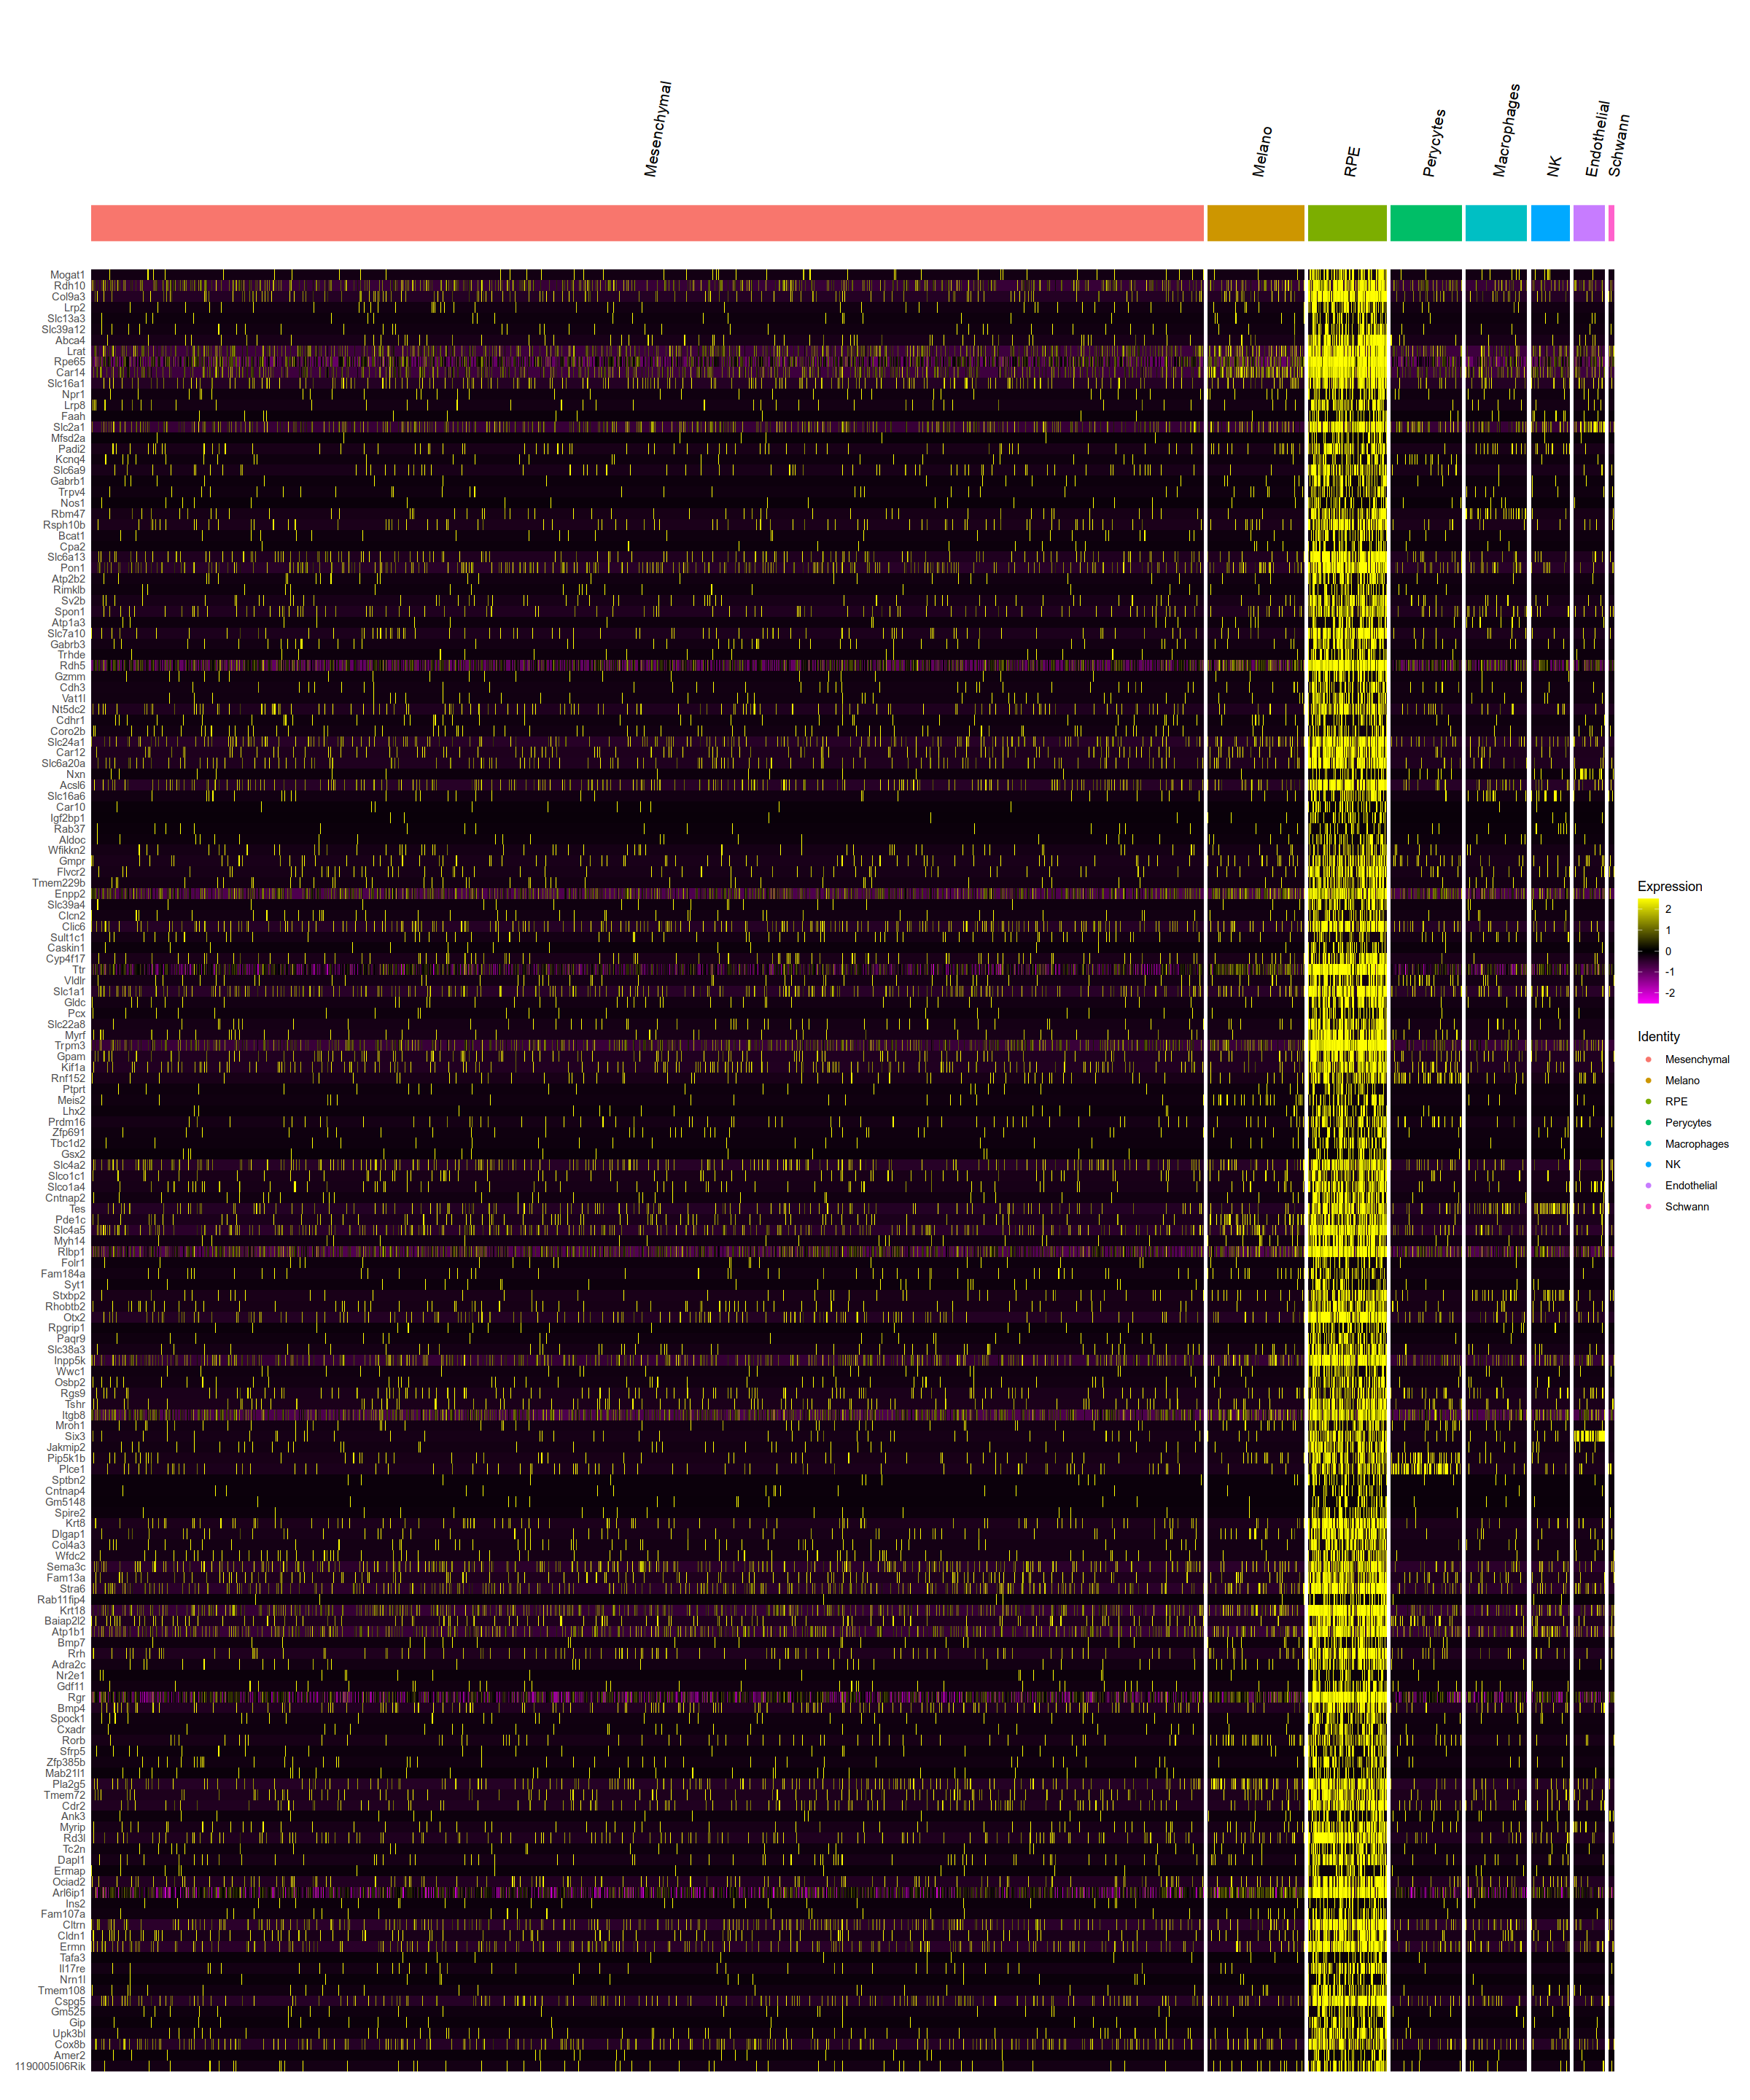

In [223]:
options(repr.plot.height = 24, repr.plot.width = 20)
pos=DoHeatmap(seurat2, features = genes_list, size = 4.5, angle = 80)
pos

In [238]:
# Create a dataframe with the intersected genes
intersect_genes <- intersect(genes_list, gene_mapping$Gene.name)
intersect_df <- gene_mapping[gene_mapping$Gene.name %in% intersect_genes, ]
head(intersect_df)


,Gene.stable.ID,Gene.name
,<chr>,<chr>
2002,ENSMUSG00000061808,Ttr
2021,ENSMUSG00000024867,Pip5k1b
2998,ENSMUSG00000034258,Flvcr2
3476,ENSMUSG00000021986,Amer2
3689,ENSMUSG00000024924,Vldlr
3774,ENSMUSG00000030235,Slco1c1


In [265]:
 #Merge the dataframes based on Gene.stable.ID and ensembl_gene_id
RPE_unique_phyl <- data1 %>%
  inner_join(intersect_df, by = c("ensembl_gene_id" = "Gene.stable.ID")) %>%
  select(ensembl_gene_id, Gene.name, everything())
head(RPE_unique_phyl)

,ensembl_gene_id,Gene.name,phylostratum,Description
,<chr>,<chr>,<int>,<chr>
1,ENSMUSG00000022843,Clcn2,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000034258,Flvcr2,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000020844,Nxn,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000032902,Slc16a1,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000030302,Atp2b2,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000028613,Lrp8,1,Life before LCA of Cellular organisms - cellular organisms


In [266]:
RPE_unique_phyl <- RPE_unique_phyl %>%
  mutate(type = "RPE_unique_GENES")

In [267]:
# Save the resulting dataframe to a CSV file
write.csv(RPE_unique_phyl, "RPE_unique_phyl.csv", row.names = FALSE)

In [268]:
#RPE_unique_phyl <- read.csv("RPE_unique_phyl.csv")

# Phylostrat   plot===    RPE_unique_phyl

In [272]:
RPE_filostr_genes1<- subset(RPE_unique_phyl,phylostratum> 10 )
head(RPE_filostr_genes1)
RPE_filostr_genes11<-RPE_filostr_genes1$Gene.name
RPE_filostr_genes11

# Remove single quotes using gsub
genes_clean <- gsub("'", "", RPE_filostr_genes11)

# Split the cleaned string into individual gene names
gene_list <- unlist(strsplit(genes_clean, split = "''"))

# Create a comma-separated string of gene names
comma_separated_genes <- paste(gene_list, collapse = ",")

# Print the comma-separated string
print(comma_separated_genes)

,ensembl_gene_id,Gene.name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
154,ENSMUSG00000055865,Tafa3,11,Olfactores - Craniata,RPE_unique_GENES
155,ENSMUSG00000021986,Amer2,11,Olfactores - Craniata,RPE_unique_GENES
156,ENSMUSG00000058174,Gm5148,11,Olfactores - Craniata,RPE_unique_GENES
157,ENSMUSG00000043088,Il17re,12,Craniata - Euteleostomi,RPE_unique_GENES
158,ENSMUSG00000042757,Tmem108,12,Craniata - Euteleostomi,RPE_unique_GENES
159,ENSMUSG00000026830,Ermn,12,Craniata - Euteleostomi,RPE_unique_GENES


[1] "Tafa3"         "Amer2"         "Gm5148"        "Il17re"       
 [5] "Tmem108"       "Ermn"          "Nrn1l"         "Gm525"        
 [9] "Cspg5"         "Cox8b"         "Gip"           "Upk3bl"       
[13] "1190005I06Rik"

[1] "Tafa3,Amer2,Gm5148,Il17re,Tmem108,Ermn,Nrn1l,Gm525,Cspg5,Cox8b,Gip,Upk3bl,1190005I06Rik"


In [252]:
# Create a vector of genes
old_RPE_17 <- c("Ins2", "Cltrn", "Slc1a1", "Cldn1", "Cdh3", "Ermn", "Myrf", "Npr1", "Tshr", "Cox8b", "Prdm16", "Gip", "Npr1", "Tshr")



In [253]:
intersect(old_RPE_17, genes_list)

[1] "Ins2"   "Cltrn"  "Slc1a1" "Cldn1"  "Cdh3"   "Ermn"   "Myrf"   "Npr1"  
 [9] "Tshr"   "Cox8b"  "Prdm16" "Gip"

In [260]:
# Create a vector of genes
genes1 <- c("Npr1", "Tshr", "Myrf", "Cltrn", "Gip", "Cdh3", "Slc1a1", "Cldn1", "Cox8b", "Ins2", "Prdm16", "Ermn")

# Print the vector to ensure it's created correctly
print(genes)


 [1] "Pmel"          "Gpnmb"         "Mreg"          "Cited1"       
 [5] "Scrg1"         "Cck"           "Fam83f"        "Azgp1"        
 [9] "Snca"          "Tmem82"        "Fxyd3"         "Psrc1"        
[13] "Bricd5"        "Prlh"          "Mlana"         "Cmtm5"        
[17] "Cort"          "Pianp"         "Smco3"         "1700001O22Rik"
[21] "Tmem88b"       "Snhg11"        "H60b"          "M5C1000I18Rik"
[25] "Gm13030"      


In [270]:
RPE_unique_phyl%>% filter(Gene.name %in% RPE_filostr_genes11)

ensembl_gene_id,Gene.name,phylostratum,Description,type
<chr>,<chr>,<int>,<chr>,<chr>
ENSMUSG00000022512,Cldn1,10,Chordata - Olfactores,RPE_unique_GENES
ENSMUSG00000015401,Cltrn,10,Chordata - Olfactores,RPE_unique_GENES
ENSMUSG00000055865,Tafa3,11,Olfactores - Craniata,RPE_unique_GENES
ENSMUSG00000021986,Amer2,11,Olfactores - Craniata,RPE_unique_GENES
ENSMUSG00000058174,Gm5148,11,Olfactores - Craniata,RPE_unique_GENES
ENSMUSG00000043088,Il17re,12,Craniata - Euteleostomi,RPE_unique_GENES
ENSMUSG00000042757,Tmem108,12,Craniata - Euteleostomi,RPE_unique_GENES
ENSMUSG00000026830,Ermn,12,Craniata - Euteleostomi,RPE_unique_GENES
ENSMUSG00000044287,Nrn1l,12,Craniata - Euteleostomi,RPE_unique_GENES


# Mel_filostr_genes

In [119]:
Mel_filostr_genes <- read.csv("MEL_genes_filostr_all_7_06.csv")
head(Mel_filostr_genes)
Mel_filostr_genes$X <- NULL
Mel_filostr_genes <- Mel_filostr_genes %>%
  select(-gtf.protein_id)

Warning message in file(file, "rt"):
“cannot open file 'MEL_genes_filostr_all_7_06.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [259]:
Mel_filostr_genes2<-Mel_filostr_genes$genes
#Mel_filostr_genes2
# Remove single quotes using gsub
genes_clean <- gsub("'", "", Mel_filostr_genes2)

# Split the cleaned string into individual gene names
gene_list <- unlist(strsplit(genes_clean, split = "''"))

# Create a comma-separated string of gene names
comma_separated_genes <- paste(gene_list, collapse = ",")

# Print the comma-separated string
print(comma_separated_genes)

[1] "Slc24a5,Glrb,Atp1a1,Gyg,Tinagl1,Tyrp1,Cyp2j6,Hpse,Mgll,Tyr,Rab38,Lgi4,Oca2,Cdk2,Dct,Gsta4,Dmxl2,Nlk,Lyst,Nrcam,Slc45a2,Scn8a,C4b,C2,Qpct,Gstp1,Cryab,Pax3,Fmn1,Paqr6,Mcoln3,Sort1,Mob3b,Tmod1,Tecpr1,Myo7a,Nav2,Adgb,Aph1c,Hhatl,Myo5a,Slc4a8,Bace2,Rasgrp3,Chsy3,Syt4,Sorbs1,Epdr1,Stmn3,Cav1,Trpm1,S100b,Sema3b,Sgcd,Fstl4,Syngr1,St3gal6,Gpc1,Gpr143,Fabp3,Bhlhe41,Cav2,Dkk3,Ednrb,Mlph,Bmyc,Gpnmb,Stox2,Fgf1,Plp1,Fam174b,Fam53b,Insc,C2cd4b,Pmel,Cited1,Il10rb,S100a1,Gjb2,Gjb6,Snca,Adm,Scrg1,Fxyd2,Cck,Lbh,Cd59a,Tmem51,Art3,Pianp,Cmtm5,Mlana,Cort,Spp1"


In [863]:
# Load necessary library
library(dplyr)

# List of genes
new_genes_list <- c('Slc24a5','Glrb','Atp1a1','Gyg','Tinagl1','Tyrp1','Cyp2j6','Hpse','Mgll','Tyr','Rab38','Lgi4','Oca2','Cdk2','Dct','Gsta4','Dmxl2','Nlk','Lyst','Nrcam','Slc45a2','Scn8a','C4b','C2','Qpct','Gstp1','Cryab','Pax3','Fmn1','Paqr6','Mcoln3','Sort1','Mob3b','Tmod1','Tecpr1','Myo7a','Nav2','Adgb','Aph1c','Hhatl','Myo5a','Slc4a8','Bace2','Rasgrp3','Chsy3','Syt4','Sorbs1','Epdr1','Stmn3','Cav1','Trpm1','S100b','Sema3b','Sgcd','Fstl4','Syngr1','St3gal6','Gpc1','Gpr143','Fabp3','Bhlhe41','Cav2','Dkk3','Ednrb','Mlph','Bmyc','Gpnmb','Stox2','Fgf1','Plp1','Fam174b','Fam53b','Insc','C2cd4b','Pmel','Cited1','Il10rb','S100a1','Gjb2','Gjb6','Snca','Adm','Scrg1','Fxyd2','Cck','Lbh','Cd59a','Tmem51','Art3','Pianp','Cmtm5','Mlana','Cort','Spp1')

# Find the intersection of the new gene list with the Gene.name column
intersect_genes <- intersect(new_genes_list, gene_mapping$Gene.name)

# Create a dataframe with the intersected genes
intersect_Mel <- gene_mapping[gene_mapping$Gene.name %in% intersect_genes, ]
head(intersect_Mel)


,Gene.stable.ID,Gene.name
,<chr>,<chr>
2209,ENSMUSG00000058152,Chsy3
3584,ENSMUSG00000022122,Ednrb
4678,ENSMUSG00000022129,Dct
6150,ENSMUSG00000033174,Mgll
6513,ENSMUSG00000004872,Pax3
6882,ENSMUSG00000032060,Cryab


In [838]:

# Merge the dataframes based on Gene.stable.ID and ensembl_gene_id
intersect_Mel_phyl <- data1 %>%
  inner_join(intersect_Mel, by = c("ensembl_gene_id" = "Gene.stable.ID")) %>%
  select(ensembl_gene_id, Gene.name, phylostratum, Description)

# Print the merged dataframe
head(intersect_Mel_phyl)


,ensembl_gene_id,Gene.name,phylostratum,Description
,<chr>,<chr>,<int>,<chr>
1,ENSMUSG00000030559,Rab38,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000028020,Glrb,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000073418,C4b,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000024371,C2,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000019726,Lyst,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000032060,Cryab,1,Life before LCA of Cellular organisms - cellular organisms


In [157]:
intersect_Mel_phyl

ERROR: Error in eval(expr, envir, enclos): object 'intersect_Mel_phyl' not found


In [860]:
intersect_Mel_phyl%>% filter(Gene.name %in% c('Mlana', 'Pmel', 'Tyr', 'Dct', 'Adm'))

ensembl_gene_id,Gene.name,phylostratum,Description
<chr>,<chr>,<int>,<chr>
ENSMUSG00000004651,Tyr,1,Life before LCA of Cellular organisms - cellular organisms
ENSMUSG00000022129,Dct,1,Life before LCA of Cellular organisms - cellular organisms
ENSMUSG00000025359,Pmel,8,Bilateria - Deuterostomia
ENSMUSG00000030790,Adm,11,Olfactores - Craniata
ENSMUSG00000024806,Mlana,12,Craniata - Euteleostomi


In [879]:
intersect_Mel_phyl <- intersect_Mel_phyl %>%
  mutate(type = "Mel_unique_GENES")

In [880]:
# Save the resulting dataframe to a CSV file
write.csv(intersect_Mel_phyl, "Mel_unique_phyl.csv", row.names = FALSE)

In [165]:
Mel_filostr_genes <- read.csv("Mel_unique_phyl.csv")

In [166]:
head(Mel_filostr_genes)

,ensembl_gene_id,Gene.name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
1,ENSMUSG00000030559,Rab38,1,Life before LCA of Cellular organisms - cellular organisms,Mel_unique_GENES
2,ENSMUSG00000028020,Glrb,1,Life before LCA of Cellular organisms - cellular organisms,Mel_unique_GENES
3,ENSMUSG00000073418,C4b,1,Life before LCA of Cellular organisms - cellular organisms,Mel_unique_GENES
4,ENSMUSG00000024371,C2,1,Life before LCA of Cellular organisms - cellular organisms,Mel_unique_GENES
5,ENSMUSG00000019726,Lyst,1,Life before LCA of Cellular organisms - cellular organisms,Mel_unique_GENES
6,ENSMUSG00000032060,Cryab,1,Life before LCA of Cellular organisms - cellular organisms,Mel_unique_GENES


In [162]:
Mel<-c('Mlana','Spp1','Gjb2','Pmel',
       'Cck','Gjb6','Art3','Cmtm5','Lbh','Cited1','Pianp',
       'S100a1','Cd59a','Il10rb','Snca','Scrg1','Cort','Fxyd2','Adm','Tmem51')

In [ ]:
Mel<-c(Mlana,Spp1
       Cck,Art3,Cmtm5,Lbh,Cited1,Pianp,
      S100a1,Cd59a,Il10rb,Snca,Scrg1,Cort,Fxyd2,Adm,Tmem51)

In [163]:
Mel_filostr_genes %>%
  filter(Gene.name %in% Mel)

ensembl_gene_id,Gene.name,phylostratum,Description,type
<chr>,<chr>,<int>,<chr>,<chr>
ENSMUSG00000046352,Gjb2,7,Eumetazoa - Bilateria,Mel_unique_GENES
ENSMUSG00000040055,Gjb6,7,Eumetazoa - Bilateria,Mel_unique_GENES
ENSMUSG00000025359,Pmel,8,Bilateria - Deuterostomia,Mel_unique_GENES
ENSMUSG00000051159,Cited1,9,Deuterostomia - Chordata,Mel_unique_GENES
ENSMUSG00000022969,Il10rb,9,Deuterostomia - Chordata,Mel_unique_GENES
ENSMUSG00000031610,Scrg1,11,Olfactores - Craniata,Mel_unique_GENES
ENSMUSG00000032532,Cck,11,Olfactores - Craniata,Mel_unique_GENES
ENSMUSG00000024063,Lbh,11,Olfactores - Craniata,Mel_unique_GENES
ENSMUSG00000025889,Snca,11,Olfactores - Craniata,Mel_unique_GENES


In [167]:
Mel_filostr_genes1<- subset(Mel_filostr_genes,phylostratum> 7)
head(Mel_filostr_genes1)
Mel_filostr_genes111<-Mel_filostr_genes1$Gene.name
Mel_filostr_genes111

# Remove single quotes using gsub
genes_clean <- gsub("'", "", Mel_filostr_genes111)

# Split the cleaned string into individual gene names
gene_list <- unlist(strsplit(genes_clean, split = "''"))

# Create a comma-separated string of gene names
comma_separated_genes <- paste(gene_list, collapse = ",")

# Print the comma-separated string
print(comma_separated_genes)

,ensembl_gene_id,Gene.name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
74,ENSMUSG00000025359,Pmel,8,Bilateria - Deuterostomia,Mel_unique_GENES
75,ENSMUSG00000029816,Gpnmb,8,Bilateria - Deuterostomia,Mel_unique_GENES
76,ENSMUSG00000051159,Cited1,9,Deuterostomia - Chordata,Mel_unique_GENES
77,ENSMUSG00000022969,Il10rb,9,Deuterostomia - Chordata,Mel_unique_GENES
78,ENSMUSG00000031610,Scrg1,11,Olfactores - Craniata,Mel_unique_GENES
79,ENSMUSG00000032532,Cck,11,Olfactores - Craniata,Mel_unique_GENES


[1] "Pmel"   "Gpnmb"  "Cited1" "Il10rb" "Scrg1"  "Cck"    "S100b"  "Lbh"   
 [9] "Snca"   "S100a1" "Adm"    "Fxyd2"  "Art3"   "Mlana"  "Cmtm5"  "Cd59a" 
[17] "Cort"   "Tmem51" "Pianp"  "Spp1"

[1] "Pmel,Gpnmb,Cited1,Il10rb,Scrg1,Cck,S100b,Lbh,Snca,S100a1,Adm,Fxyd2,Art3,Mlana,Cmtm5,Cd59a,Cort,Tmem51,Pianp,Spp1"


# Phylostrat plot=== intersect_Mel_phyl

In [881]:
intersect_Mel_phyl1<- subset(intersect_Mel_phyl,phylostratum> 8)
head(intersect_Mel_phyl1)
intersect_Mel_phyl11<-intersect_Mel_phyl1$Gene.name
intersect_Mel_phyl11

# Remove single quotes using gsub
genes_clean <- gsub("'", "", intersect_Mel_phyl11)

# Split the cleaned string into individual gene names
gene_list <- unlist(strsplit(genes_clean, split = "''"))

# Create a comma-separated string of gene names
comma_separated_genes <- paste(gene_list, collapse = ",")

# Print the comma-separated string
print(comma_separated_genes)

,ensembl_gene_id,Gene.name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
76,ENSMUSG00000051159,Cited1,9,Deuterostomia - Chordata,Mel_unique_GENES
77,ENSMUSG00000022969,Il10rb,9,Deuterostomia - Chordata,Mel_unique_GENES
78,ENSMUSG00000031610,Scrg1,11,Olfactores - Craniata,Mel_unique_GENES
79,ENSMUSG00000032532,Cck,11,Olfactores - Craniata,Mel_unique_GENES
80,ENSMUSG00000033208,S100b,11,Olfactores - Craniata,Mel_unique_GENES
81,ENSMUSG00000024063,Lbh,11,Olfactores - Craniata,Mel_unique_GENES


[1] "Cited1" "Il10rb" "Scrg1"  "Cck"    "S100b"  "Lbh"    "Snca"   "S100a1"
 [9] "Adm"    "Fxyd2"  "Art3"   "Mlana"  "Cmtm5"  "Cd59a"  "Cort"   "Tmem51"
[17] "Pianp"  "Spp1"

[1] "Cited1,Il10rb,Scrg1,Cck,S100b,Lbh,Snca,S100a1,Adm,Fxyd2,Art3,Mlana,Cmtm5,Cd59a,Cort,Tmem51,Pianp,Spp1"


# read tables with tfs

In [ ]:
Mel_filostr_Tfs <- read.csv("../Mel_filostr_Tfs_unique_29_07_Last.csv")

In [894]:
RPE_filostr_Tfs <- read.csv("../RPE_filostr_Tfs_unique_29_07_Last.csv")

In [1031]:
head(RPE_filostr_Tfs)

,ensembl_gene_id,Gene.name,phylostratum,Description,type
,<chr>,<chr>,<int>,<chr>,<chr>
1,ENSMUSG00000028405,Aco1,1,Life before LCA of Cellular organisms - cellular organisms,RPE_filostr_Tfs
2,ENSMUSG00000024978,Gpam,1,Life before LCA of Cellular organisms - cellular organisms,RPE_filostr_Tfs
3,ENSMUSG00000054256,Msi1,1,Life before LCA of Cellular organisms - cellular organisms,RPE_filostr_Tfs
4,ENSMUSG00000030970,Ctbp2,1,Life before LCA of Cellular organisms - cellular organisms,RPE_filostr_Tfs
5,ENSMUSG00000032187,Smarca4,1,Life before LCA of Cellular organisms - cellular organisms,RPE_filostr_Tfs
6,ENSMUSG00000059049,Frem1,1,Life before LCA of Cellular organisms - cellular organisms,RPE_filostr_Tfs


In [899]:
merged_df_TF_RPE_MEl_intersect <- read.csv("../merged_df_TF_RPE_MEl_intersect.csv")

In [1030]:
merged_df_TF_RPE_MEl_intersect

ensembl_gene_id,Gene.name,phylostratum,Description,type
<chr>,<chr>,<int>,<chr>,<chr>
ENSMUSG00000025190,Got1,1,Life before LCA of Cellular organisms - cellular organisms,RPE_Mel_tfs_intersect_
ENSMUSG00000032187,Smarca4,1,Life before LCA of Cellular organisms - cellular organisms,RPE_Mel_tfs_intersect_
ENSMUSG00000063524,Eno1,1,Life before LCA of Cellular organisms - cellular organisms,RPE_Mel_tfs_intersect_
ENSMUSG00000033006,Sox10,2,cellular organisms - Eukaryota,RPE_Mel_tfs_intersect_
ENSMUSG00000035158,Mitf,2,cellular organisms - Eukaryota,RPE_Mel_tfs_intersect_
ENSMUSG00000030256,Bhlhe41,5,Holozoa - Metazoa,RPE_Mel_tfs_intersect_


In [1038]:
head(ciona_Phyl)

ensembl_gene_id,phylostratum,Description,Gene.Name,type
<chr>,<dbl>,<chr>,<chr>,<chr>
ENSMUSG00000074155,1,Life before LCA of Cellular organisms - cellular organisms,Klk5,ciona_GENES
ENSMUSG00000055193,1,Life before LCA of Cellular organisms - cellular organisms,Klk15,ciona_GENES
ENSMUSG00000004789,1,Life before LCA of Cellular organisms - cellular organisms,Dlst,ciona_GENES
ENSMUSG00000040452,1,Life before LCA of Cellular organisms - cellular organisms,Cdh12,ciona_GENES
ENSMUSG00000025949,1,Life before LCA of Cellular organisms - cellular organisms,Pikfyve,ciona_GENES
ENSMUSG00000040420,1,Life before LCA of Cellular organisms - cellular organisms,Cdh18,ciona_GENES


In [1043]:
ciona_Phyl <- ciona_Phyl %>%
  select(ensembl_gene_id, Gene.name, phylostratum, Description, type)

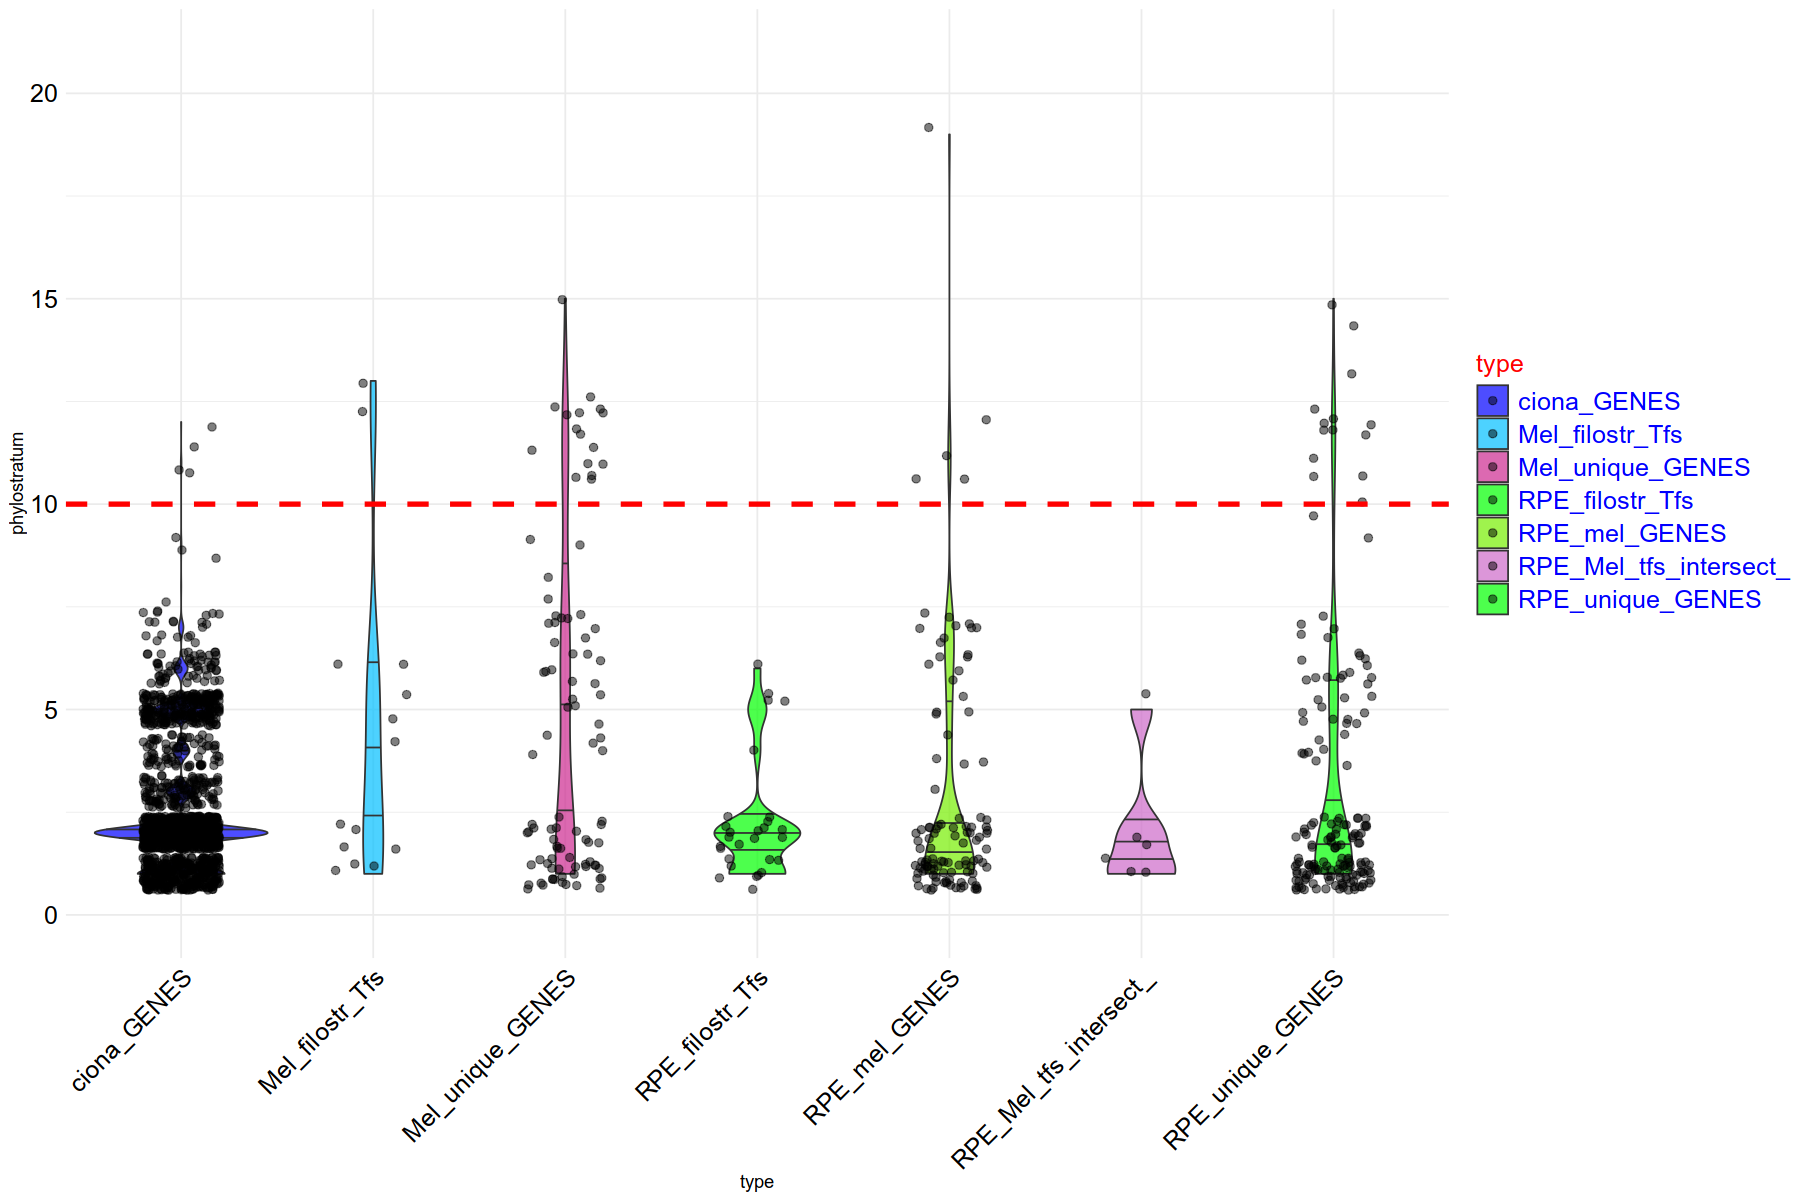

In [1049]:
combined_df01 <- rbind(intersect_Mel_phyl,RPE_unique_phyl, intersect_RPE_Mel_phyl, Mel_filostr_Tfs,RPE_filostr_Tfs,merged_df_TF_RPE_MEl_intersect, ciona_TF
                    
                    # RPE_filostr_Tfs,RPE_filostr_genes,Mel_filostr_genes,MEL_RPE_genes_filostr,
                     # ascid
                    #  RPE.marker_filostr,RPE_Mel_intersect_filostr_genes
                     )

options(repr.plot.height =10, repr.plot.width = 15)
pos <-ggplot(combined_df01, aes(x = type, y = phylostratum, fill = type)) +
  geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), alpha = 0.7) +
  geom_jitter(position = position_jitter(width = 0.2), size = 2, alpha = 0.5) +
  scale_fill_manual(values = c("#0000FF", '#00BFFF', '#CD2990', 'green', '#76EE00', '#CD69C9', 'green')) +
  theme_minimal() +
  coord_cartesian(ylim = c(0, 21)) +
  scale_y_continuous(breaks = seq(0, 21, by = 5)) +
  theme(legend.title = element_text(color = "red", size = 15),  # Change legend title color and size
        legend.text = element_text(color = "blue", size = 15),   # Change legend text color and size
        legend.key.size = unit(0.7, "cm"),  # Change legend key size
        axis.text.x = element_text(size = 15, angle = 45, hjust = 1, color = "black"),  # Change x-axis text size, angle, alignment, and color
        axis.text.y = element_text(size = 15, color = "black")) +  # Change y-axis text size and color
  geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 1.5)  # Add horizontal line at y = 20
pos